In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4862,spam,Bored housewives! Chat n date now! 0871750.77....,NaN,NaN,NaN
975,ham,Hey no I ad a crap nite was borin without ya 2...,NaN,NaN,NaN
5551,ham,Wen did you get so spiritual and deep. That's ...,NaN,NaN,NaN
1854,ham,They did't play one day last year know even th...,NaN,NaN,NaN
2317,ham,Waqt se pehle or naseeb se zyada kisi ko kuch ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)  # inplace is a permanent operation

In [8]:
df.sample(5)

,v1,v2
458,ham,1.20 that call cost. Which i guess isnt bad. M...
4104,ham,Jus finish my lunch on my way home lor... I to...
3769,ham,Love it! The girls at the office may wonder wh...
2878,ham,U still painting ur wall?
4497,spam,Latest Nokia Mobile or iPOD MP3 Player +�400 p...


In [9]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2719,ham,Go where n buy? Juz buy when we get there lar.
3328,ham,Sac will score big hundred.he is set batsman:-)
4497,spam,Latest Nokia Mobile or iPOD MP3 Player +�400 p...
3820,ham,You are right though. I can't give you the spa...
5346,ham,"My Parents, My Kidz, My Friends n My Colleague..."


In [10]:
# we use label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# checking for misssing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicate
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2. EDA


In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

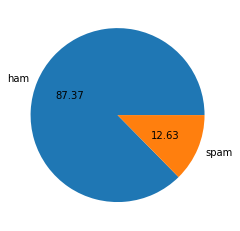

In [20]:
# for better repersentation for the hamm and spam we use pychart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f") 
# autopct for percentage value two values after pnt
plt.show() #to remove extra piece of code and sow image

In [21]:
# from the above image we can see that data is inbalance

In [22]:
# for deaper analysis we add three new col
# 1. no of characters in sms
# 2. no of words in the sms
# 3. no of sentence in the sms
# for that we use natural language tool kit library
#!pip install nltk
import nltk

In [ ]:
nltk.download("punkt")

In [24]:
df['num_characters'] = df['text'].apply(len)
# that wil show length of each sentence in character

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# ham
# we can analyze ham and spam seperately
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [33]:
# for plotting histogram
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

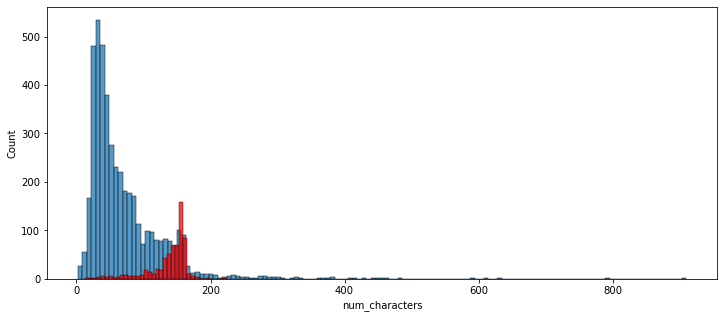

In [34]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

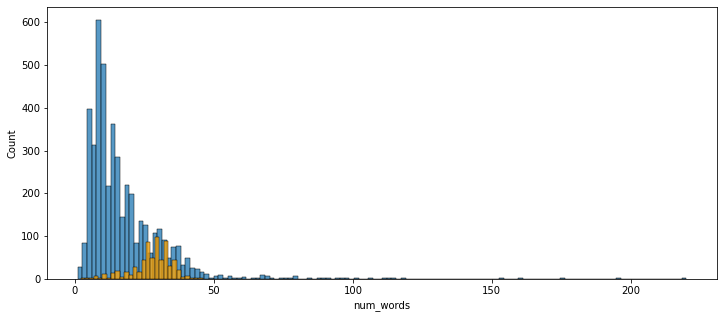

In [35]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='orange')

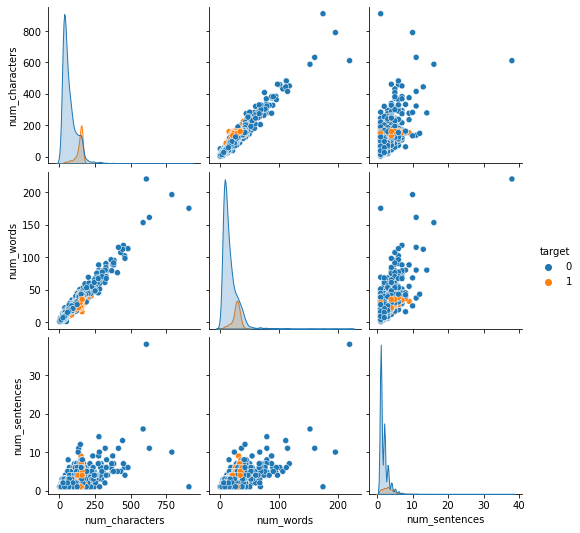

In [36]:
# relationship
sns.pairplot(df,hue='target')

<AxesSubplot:>

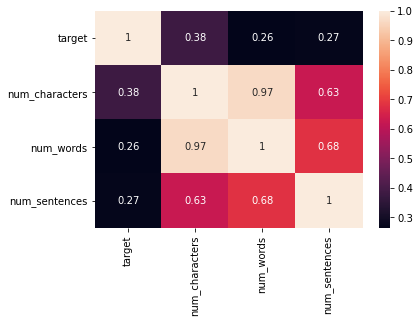

In [37]:
#corelation
sns.heatmap(df.corr(),annot=True)
# when its close to 1 number spam will increase

# 3. Data Preprocessing

In [38]:
#     Lower case
#     Tokenization
#     Removing Special characters
#     Removing stop words and punctuation
#     Stemming or limitizatoin(convert all same meaning word into one word)

In [39]:
def transform_text(text):
    #     Lower case
    text = text.lower()
    #     Tokenization
    text =nltk.word_tokenize(text)
    #     Removing Special characters
    
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [40]:
from nltk.corpus import stopwords
# stdopwords.words('english')

In [41]:
import string
# string.punctuation

In [42]:
# for stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# ps.stem('dancing')

In [43]:
transform_text('Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. �1.50 SP:Tyrone')

'sunshin quiz wkli q win top soni dvd player u know countri algarv txt ansr 82277 sp tyron'

In [44]:
df['text'][133]

'Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. �1.50 SP:Tyrone'

In [45]:
df['Transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
# for making word cloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [48]:
!pip install wordcloud

In [49]:
spam_wc = wc.generate(df[df['target']==1]['Transformed_text'].str.cat(sep=" "))
# from the above line of code we get the wordcloud object

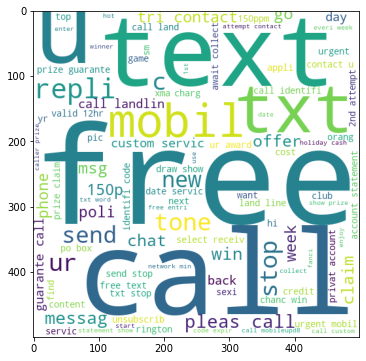

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['target']==0]['Transformed_text'].str.cat(sep=" "))
# from the above line of code we get the wordcloud object

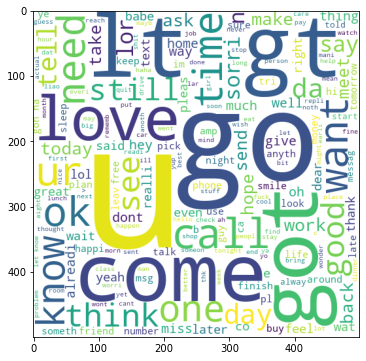

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [53]:
# top 30 words for spam 
spam_corpus = []
for msg in df[df['target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9941

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1]) # its make the dictionary and words count
plt.xticks(rotation='vertical')
plt.show()

In [56]:
# top 30 words for ham 
ham_corpus = []
for msg in df[df['target']==0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35303

In [ ]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1]) # its make the dictionary and words count
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [59]:
# now for model build we use naive bayes Algorithm b/c its work good on textual data
# and firstly every model needs numerical input but here we ve input in text and output in target
# so firstly we convert text into vectorize bagofwords

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [61]:
x = tfidf.fit_transform(df['Transformed_text']).toarray()

In [62]:
x.shape 
# sms,words
# now we do scaling for better performance
# we use minmax scalar while standared scalr gives negative values as well
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)
# After scaling we get the accuracy better but with bad precision value
# so we don't use scaling in our flow

(5169, 3000)

In [63]:
y = df['target'].values

In [64]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# we add all the algorithm b/c we don't know the data distribution
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [70]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [71]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [72]:
# tfidf----> MNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='11')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50, random_state=2)

In [74]:
#  make a dictionary in Which keys contain algorithm name while values contain object name
clfs ={
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
#     'LR' : lrc,
    'RF' : rfc,
#     'AdaBoost' : abc,
#     'BgC' : bc,
#     'ETC' : etc,
    'GBDT' : gbdt,
#     'xgb' : xgb
}

In [75]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [76]:
# train_classifier(svc,x_train,y_train,x_test,y_test)

In [77]:
# train_classifier(rfc,x_train,y_train,x_test,y_test)

In [78]:
# train_classifier(xgb,x_train,y_train,x_test,y_test)

In [79]:
accuracy_scores =[]
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    print("For ",name)
    print("Accuracy ",current_accuracy)
    print("Precision ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy  0.9748549323017408
Precision  0.9745762711864406
For  KN
Accuracy  0.9052224371373307
Precision  1.0
For  NB
Accuracy  0.971953578336557
Precision  1.0
For  DT
Accuracy  0.9313346228239845
Precision  0.8252427184466019
For  RF
Accuracy  0.9758220502901354
Precision  0.9829059829059829
For  GBDT
Accuracy  0.9468085106382979
Precision  0.9278350515463918


In [80]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [81]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
4,RF,0.975822,0.982906
0,SVC,0.974855,0.974576
5,GBDT,0.946809,0.927835
3,DT,0.931335,0.825243


In [82]:
# sns.catplot(x = 'Algorithm', y='value',
#             hue = 'variable',data=performance_df, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show

In [83]:
# model improve
# change the max feature parameter of Tfidf

In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False) 

In [85]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy_x,Precision_x,Accuracy_y,Precision_y
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.974855,0.974576,0.974855,0.974576
4,GBDT,0.946809,0.927835,0.946809,0.927835
5,DT,0.931335,0.825243,0.931335,0.825243


In [86]:
# we did'nt use the voting and stacking b/c we havent get the good prec and accur
# in voting we make a new algorithm of same contribution of models
# while in stacking we gave different different waitage to algorithm nd from that we can get a new algorithmb

In [87]:
# now from the above result we can say that multinomial naive bayes is better algor than other
import pickle
pickle.dump(tfidf,open('vectorized.pkl','wb')) # wb -> write binary
pickle.dump(mnb,open('model.pkl','wb'))

In [88]:
tfidff = pickle.load(open('vectorized.pkl','rb'))
modell = pickle.load(open('model.pkl','rb'))

In [105]:
io = 'spook up your mob with hallowen.'

In [106]:

# 1. preprocess
transformed_sms = transform_text(io)
# 2. vectorizesunshin quiz wkli q win top soni dvd player u know countri algarv txt ansr 82277 sp tyron
vector_input = tfidff.transform([transformed_sms])
# 3. pridict
result = modell.predict(vector_input)[0]
# 4. Display
if result == 1:
    print("Spam")
else:
    print("Not Spam")

Spam
